<a href="https://colab.research.google.com/github/GeetanjaliWadhwa/PYTHON-PROJECTS/blob/main/Handwritten_Digits_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HANDWRITTEN DIGITS RECOGNITION**

**Goal:** To identify the handwritten digits through various classification algorithms.

We will use the following algorithms from sklearn library on our dataset to classify the digits:

SVM (support vector machine)

Gaussian Naive Bayes 

Decision Trees

Random Forest

KNN (K Nearest Neighbours)

Stochastic Gradient Descent


# **LOADING THE DATASET**

In [ ]:
from sklearn import datasets #to use inbuilt datasets

In [ ]:
digits= datasets.load_digits()  #collection of handwritten digits as images in (8,8) format 

In [ ]:
print(digits.DESCR)  #dataset description

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
digits.data  #input set of images

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target #output set(numerical values represented by the images)

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits.data.shape  #1797 images of 8*8 size

(1797, 64)

In [ ]:
len(digits.data)

1797

In [ ]:
digits.images[0]  #each image is contained in an array of (8,8) shape



array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

# **VISUALISING THE IMAGE (Array)**

In [ ]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

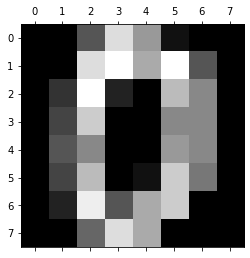

In [ ]:
#method 1
plt.gray()
plt.matshow(digits.images[0])
plt.show()

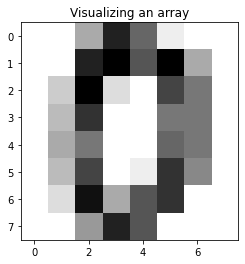

In [ ]:
#method 2
plt.imshow(digits.images[0],cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Visualizing an array')
plt.show()

matshow(): to represent an array as a matrix in a new figure window

imshow(): used to display data as a 2D image 

cmap= gray_r : displays an inverse gray scale image (r= reverse)

interpolation= 'nearest' : displays image without trying to interpolate between pixels if the display resolution is not the same as the image resolution.

Interpolation is a technique in Python used to estimate unknown data points between two known data points.

In [ ]:
import numpy as np  #for zip function


In [ ]:
list(zip(digits.images, digits.target))

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0.,  0.,

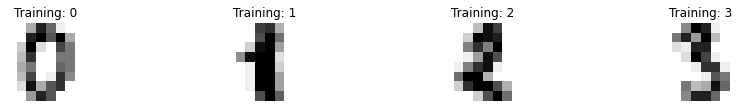

In [ ]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels=list(zip(digits.images, digits.target))

for index, (image,label) in enumerate(images_and_labels[:4]):
    plt.subplot(2,4, index +1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r ,interpolation='nearest')
    plt.title('Training: %i'% label)
plt.show()  

figure(): to create a new figure with a specified size 

subplots_adjust(hspace=0.8): to adjust the space between the rows of the subplots

zip(): to combine two lists for easier handling

enumerate(): adds a counter to an iterable and returns it.

subplot(): to add a subplot to a current figure at the specified grid position.

syntax- subplot(no. of rows for figure, no. of columns for figure, serial no. of plot)

# **FLATTEN THE INPUT IMAGES**

To apply a classifier to this data set, we need to flatten the image
i.e., we will create a flat array of 64-pixel values so that each pixel corresponds to a column for the classifier.

to turn the data into a (sample,feature) matrix:

sample refers to row of matrix and feature refers to column of matrix

In [ ]:
n_samples=len(digits.images)
digits.images.reshape((n_samples,-1))

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
data=digits.images.reshape((n_samples,-1))

# **SPLITTING DATA INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(data, digits.target,test_size=0.5, shuffle=False)

# **TRAINING THE DATA**

In case of digits dataset, the task is to predict, given the image, which digit it represents.

we are given samples of each of the 10 possible classes (digits 0 to 9) on which we fit the estimator to be able to predict the classes to which the unseen samples belong.

l.e., we are going to train some data and predict the rest on its basis

Estimator: implements the methods fit(X,y) and predict(T)
X: training data,
y: coresponding output
fit(): learns the model using training data
predict(): predict our output for unseen data

We will use different algorithms as classifiers, to train the data, make predictions and print the Classfication Report,the confusion matrix and the accuracy score.

# **1. SUPPORT VECTOR MACHINES(SVM)**

class sklearn.svm.SVC is an example of an estimator which implements Support Vector Classifcation

SVM estimatir take few arguments as a constructor

In [ ]:
from sklearn import svm

**METHOD 1**

In [ ]:
#create a support vector classifier
svm_classifier=svm.SVC(gamma=0.001)

In [ ]:
#learning the algorithm using first half of the data
# '//' divides the first number by second and round off the result giving a whole number as output
svm_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#predicting the value of digits in the second half of data
expected= y_test
predicted= svm_classifier.predict(X_test)

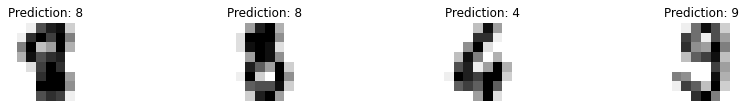

In [ ]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_predictions= list(zip(digits.images[n_samples//2:],predicted))

for index, (image,prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2,4,index+5)  
    plt.axis('off') 
    plt.imshow(image,cmap=plt.cm.gray_r ,interpolation='nearest')   
    plt.title('Prediction: %i'% prediction)   
plt.show() 

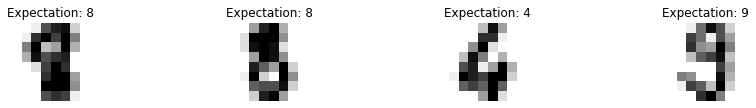

In [ ]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_expectations= list(zip(digits.images[n_samples//2:],expected))

for index, (image,expectation) in enumerate(images_and_expectations[:4]):    
    plt.subplot(2,4,index+5) 
    plt.axis('off')   
    plt.imshow(image,cmap=plt.cm.gray_r ,interpolation='nearest')   
    plt.title('Expectation: %i'% expectation)    
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print("classification report for classifier %s:\n%s\n"
% (svm_classifier, metrics.classification_report(expected,predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected,predicted))

classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

 **METHOD 2**

In [ ]:
svm_clf=svm.SVC(gamma=0.001, C=100)

svm_clf: classifier variable

'gamma' & 'C' in the above code are called hyper parameters.
Hyper parameters are parameters that are not directly learnt with estimators. In scikit-learn, they are passed as parameters to the constructors of estimator classes. Eg, C, gamma, kernel for support vector classification.

In [ ]:
svm_clf.fit(digits.data[:-1],digits.target[:-1])  #creates the estimator using all the data except the last entry

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_clf.predict(digits.data[-1:]) #testing the last value

array([8])

In [ ]:
digits.target[-1:]  #same as predicted above

array([8])

# **2. GAUSSIAN NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB_classifier= GaussianNB()

In [ ]:
GNB_classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predicted= GNB_classifier.predict(X_test)
expected= y_test

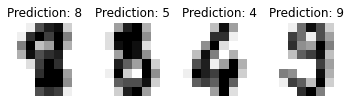

In [ ]:
plt.subplots_adjust( hspace=0.8)
images_and_predictions= list(zip(digits.images[n_samples//2:],predicted))

for index, (image,prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2,4,index+5)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

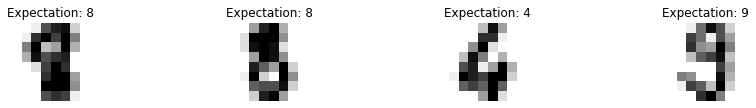

In [ ]:
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_expectations=list(zip(digits.images[n_samples//2:],expected))

for index, (image, expectation) in enumerate (images_and_expectations[:4]):
    plt.subplot(2,4,index+5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Expectation: %i'%expectation)

plt.show()


Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.81      0.74      0.77        91
           2       0.87      0.84      0.85        86
           3       0.88      0.79      0.83        91
           4       1.00      0.73      0.84        92
           5       0.70      0.81      0.76        91
           6       0.96      0.99      0.97        91
           7       0.65      0.81      0.72        89
           8       0.61      0.76      0.68        88
           9       0.77      0.66      0.71        92

    accuracy                           0.81       899
   macro avg       0.82      0.81      0.81       899
weighted avg       0.82      0.81      0.81       899



Confusion matrix:
[[84  0  0  0  0  2  0  0  1  1]
 [ 0 67  2  0  0  0  0  2 13  7]
 [ 0  8 72  0  0  1  2  0  3  0]
 [ 0  2  2 72  0  2  0  2  9  2]
 [ 1 

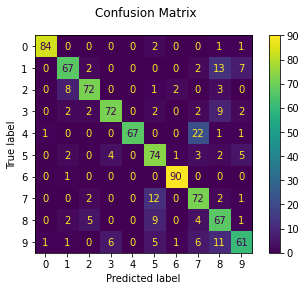

In [ ]:
print("\nClassification report for classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(expected,predicted)))
disp= metrics.plot_confusion_matrix(GNB_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s"% disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", GNB_classifier.score(X_test,y_test))
plt.show()

# **3. DECISION TREES**

In [ ]:
from sklearn import tree

In [ ]:
dt_classifier= tree.DecisionTreeClassifier()

In [ ]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predicted=dt_classifier.predict(X_test)
expected= y_test

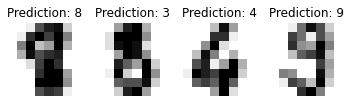

In [ ]:
plt.subplots_adjust(hspace=0.8)
images_and_predictions= list(zip(digits.images[n_samples//2:],predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
      plt.subplot(2,4,index+5)
      plt.axis('off')
      plt.imshow(image, cmap= plt.cm.gray_r, interpolation ='nearest')
      plt.title('Prediction: %i' % prediction)

plt.show()

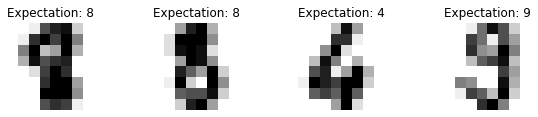

In [ ]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(hspace=0.5)
images_and_expectations= list(zip(digits.images[n_samples//2:],expected))

for index, (image, expectation) in enumerate(images_and_expectations[:4]):
      plt.subplot(2,4,index+5)
      plt.axis('off')
      plt.imshow(image, cmap= plt.cm.gray_r, interpolation ='nearest')
      plt.title('Expectation: %i' % expectation)

plt.show()



Classification report for classifier DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        88
           1       0.79      0.59      0.68        91
           2       0.90      0.70      0.78        86
           3       0.73      0.75      0.74        91
           4       0.84      0.78      0.81        92
           5       0.60      0.75      0.67        91
           6       0.86      0.92      0.89        91
           7       0.91      0.80      0.85        89
           8       0.53      0.61      0.57    

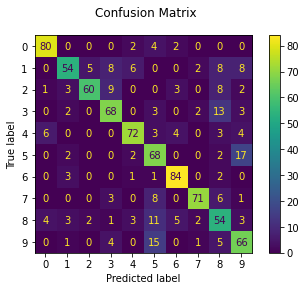

In [ ]:
print("\nClassification report for classifier %s:\n%s\n" % (dt_classifier, metrics.classification_report(expected, predicted)))
disp= metrics.plot_confusion_matrix(dt_classifier,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s"% disp.confusion_matrix)
print("\nAccuracy of the algorithm: ", dt_classifier.score(X_test, y_test))
plt.show()


# **4. RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_classifier=RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predicted= RF_classifier.predict(X_test)
expected= y_test

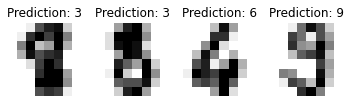

In [ ]:
plt.subplots_adjust(hspace=0.8)
images_and_predictions= list(zip(digits.images[n_samples//2:],predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
      plt.subplot(2,4,index+5)
      plt.axis('off')
      plt.imshow(image, cmap = plt.cm.gray_r, interpolation ='nearest')
      plt.title('Prediction: %i' %prediction)
plt.show()

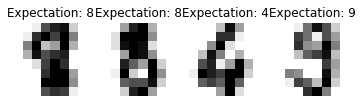

In [ ]:
plt.subplots_adjust(hspace=0.8)
images_and_expectations= list(zip(digits.images[n_samples//2:],expected))

for index, (image, expectation) in enumerate(images_and_expectations[:4]):
      plt.subplot(2,4,index+5)
      plt.axis('off')
      plt.imshow(image, cmap = plt.cm.gray_r, interpolation ='nearest')
      plt.title('Expectation: %i' %expectation)
plt.show()



Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        88
           1       0.90      0.42      0.57        91
           2       0.66      0.80      0.72        86
           3       0.55      0.82      0.66        91
           4       0.91      0.82      0.86        92
           5       0.74      0.62      0.67        91
           6       0.87      0.99      0.

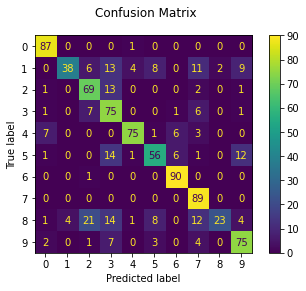

In [ ]:
print("\nClassification report for classifier %s:\n%s\n" % (RF_classifier, metrics.classification_report(expected, predicted)))
disp= metrics.plot_confusion_matrix(RF_classifier,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s"% disp.confusion_matrix)
print("\nAccuracy of the algorithm: ", RF_classifier.score(X_test, y_test))
plt.show()


# **5. K NEAREST NEIGHBOURS(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_classifier=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [ ]:
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predicted= KNN_classifier.predict(X_test)
expected= y_test

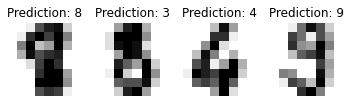

In [ ]:
plt.subplots_adjust(hspace=0.8)
images_and_predictions= list(zip(digits.images[n_samples//2:],predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
      plt.subplot(2,4,index+5)
      plt.axis('off')
      plt.imshow(image, cmap = plt.cm.gray_r, interpolation ='nearest')
      plt.title('Prediction: %i' %prediction)
plt.show()

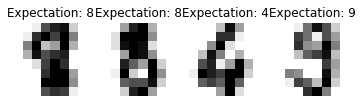

In [ ]:
plt.subplots_adjust(hspace=0.8)
images_and_expectations= list(zip(digits.images[n_samples//2:],expected))

for index, (image, expectation) in enumerate(images_and_expectations[:4]):
      plt.subplot(2,4,index+5)
      plt.axis('off')
      plt.imshow(image, cmap = plt.cm.gray_r, interpolation ='nearest')
      plt.title('Expectation: %i' %expectation)
plt.show()


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



Confusion mat

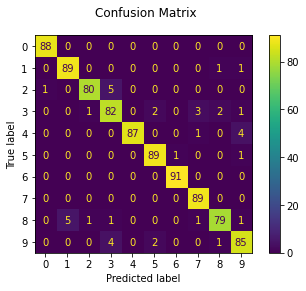

In [ ]:
print("\nClassification report for classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(expected, predicted)))
disp= metrics.plot_confusion_matrix(KNN_classifier,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s"% disp.confusion_matrix)
print("\nAccuracy of the algorithm: ", KNN_classifier.score(X_test, y_test))
plt.show()


# **6. STOCHASTIC GRADIENT DESCENT**

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_classifier= SGDClassifier(loss="hinge", penalty="l2",max_iter=5)

In [ ]:
sgd_classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
predicted= sgd_classifier.predict(X_test)
expected= y_test

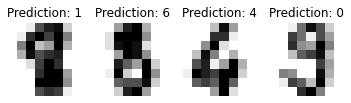

In [ ]:
plt.subplots_adjust(hspace=0.8)
images_and_predictions= list(zip(digits.images[n_samples//2:],predicted))
plt.subplots_adjust(hspace=0.8)

for index, (image, prediction) in enumerate(images_and_predictions[:4]):
      plt.subplot(2,4,index+1)
      plt.axis('off')
      plt.imshow(image, cmap= plt.cm.gray_r, interpolation ='nearest')
      plt.title('Prediction: %i' %prediction)
plt.show()

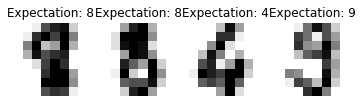

In [ ]:
plt.subplots_adjust(hspace=0.8)
images_and_expectations= list(zip(digits.images[n_samples//2:],expected))

for index, (image, expectation) in enumerate(images_and_expectations[:4]):
      plt.subplot(2,4,index+5)
      plt.axis('off')
      plt.imshow(image, cmap= plt.cm.gray_r, interpolation ='nearest')
      plt.title('Expectation: %i' %expectation)
plt.show()


Classification report for classifier SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        88
           1       0.87      0.88      0.87        91
           2       1.00      0.91      0.95        86
           3       0.89      0.88      0.88        91
           4       0.97      0.91      0.94        92
           5       0.86      0.96      0.91        91
           6       0.94      0.99      0.96        91
           7       0.89      1.00      0.94        89
           8       0.96      0.75      0.84        88

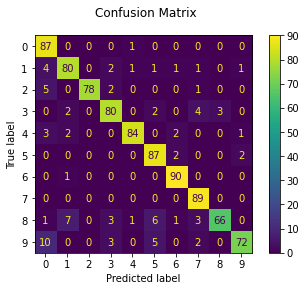

In [ ]:
print("\nClassification report for classifier %s:\n%s\n" % (sgd_classifier, metrics.classification_report(expected, predicted)))
disp= metrics.plot_confusion_matrix(sgd_classifier,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s"% disp.confusion_matrix)
print("\nAccuracy of the algorithm: ", sgd_classifier.score(X_test, y_test))
plt.show()
